In [1]:
# Initial imports
import pandas as pd
from pathlib import Path


In [2]:
# Data loading
file_path = Path("crypto_data.csv")
crypto_df = pd.read_csv(file_path)
crypto_df


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
crypto_df.shape


(1252, 7)

In [4]:
#filter 'IsTrading column'  for True only

crypto_traded_df = crypto_df[crypto_df['IsTrading']==True]

# , inplace = True

# en_users_df = users_df[users_df['stem_key_flag']==True]

crypto_traded_df


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
crypto_traded_df.shape


(1144, 7)

In [6]:
crypto_traded_df.dtypes


Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [7]:
#drop 'IsTrading', 'Unnamed', 'CoinName' columns  ....  not needed

crypto_traded_df.drop(columns=["Unnamed: 0", "CoinName", "IsTrading"], inplace=True)
crypto_traded_df


C:\Users\D\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,X11,PoW/PoS,NaN,2300000000
2,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SHA-256,PoW,NaN,611000
4,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...
1243,Ethash,PoW,NaN,1000000000
1244,SHA-256,DPoI,NaN,1000000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [8]:
new_crypto_df = crypto_traded_df.dropna()
new_crypto_df


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [9]:
# filter for total coins mined  ( TotalCoinsMined > 0 )

mined_crypto_df = new_crypto_df[new_crypto_df['TotalCoinsMined'] > 0]
mined_crypto_df


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [10]:
# drop CoinName column... not needed    <<<<  done in earlier drop  

# mined_crypto_df.drop(columns=["CoinName"], inplace=True)
# mined_crypto_df     


In [11]:
mined_crypto_dummies_df = pd.get_dummies(mined_crypto_df, columns=['Algorithm', 'ProofType'])
mined_crypto_dummies_df


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# mined_crypto_dummies_df = pd.get_dummies(mined_crypto_df)    creates dummies for TotalCoinSupply ??  do we need?  
# mined_crypto_dummies_df


# change w/ dummy variables  532rows x4col   >>>  532rows x98col

In [13]:
#standardize dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np

X = mined_crypto_dummies_df

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled.shape



(532, 98)

In [14]:
# dir(X)

## PCA

In [15]:
### Dimensionality Reduction (PCA)

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 20 (unsupervised) - 1 - 6

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get principal components for the data.
X_pca = pca.fit_transform(X_scaled)


X_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         3.78193757e-15, -4.01515397e-16,  2.42668141e-16],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         3.35586611e-15, -5.76223131e-16,  5.07176679e-18],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
        -7.36743549e-14,  3.18251149e-14, -1.96786531e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -1.98949353e-14,  3.42963077e-14, -6.67699842e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         1.03030237e-15,  2.19497009e-15, -6.63628273e-16],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         2.60414021e-15,  2.42759601e-16, -1.50589572e-15]])

In [16]:
X_pca.shape


(532, 74)

#  change w/ PCA  532rows x98col  >>> 532rows x74col


## t-SNE  


In [17]:
### t-SNE

from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=100)
tsne_features = tsne.fit_transform(X_pca)
tsne_features


array([[-14.752042  ,  -5.108131  ],
       [-21.607954  ,  -6.7753277 ],
       [-27.308805  , -11.488223  ],
       ...,
       [ 16.318598  , -12.190689  ],
       [ 21.338037  ,  -0.79553443],
       [  2.6740274 ,  14.379494  ]], dtype=float32)

In [18]:
# Check that dimensions have been reduced to two
tsne_features.shape


(532, 2)

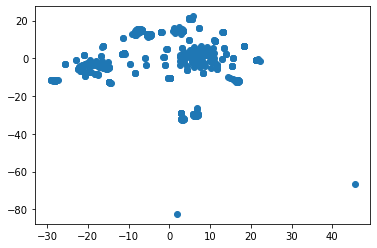

In [19]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])

plt.show()


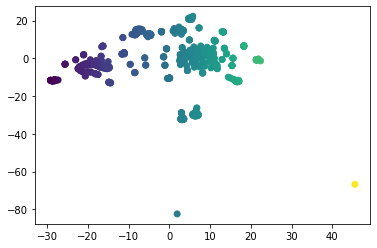

In [20]:
# # Plot the results
# plt.scatter(tsne_features[:,0], tsne_features[:,1], c=tsne_features[:,0])

# plt.show()



# 



## k-Means

In [21]:
# # Predicting clusters with k=3

# # Initialize the k-means model
# model = KMeans(n_clusters=3, random_state=0)

# # Fit the model
# model.fit(tsne_features)

# # Predict clusters
# predictions = model.predict(tsne_features)

# # Add the predicted class column to the dataframe
# df_X_pca["class"] = model.labels_
# df_X_pca.head()


C:\Users\D\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


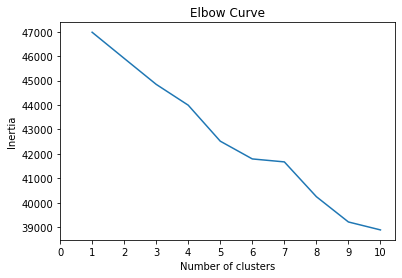

In [23]:
# Cluster Analysis with k-Means

# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
#   km.fit(tsne_features)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


## slight elbow at 7

## 

# Recommendation

**After performing preprocessing of dataset and dimension reduction by PCA and t-SNE, k-Means was utilized with the PCA component in cluster analysis to determine if cryptocurrencies can be clustered together  (see source below for reasoning). The findings from the data suggest that there are no definitive groupings, therefore, I conclude that this set of cryptocurrency cannot be clustered. 

  


source: https://www.biostars.org/p/411630/#411690